In [1]:
from core.new import Module, Linear, Sigmoid, Tanh
from core.losses import MSELoss, CrossEntropyLoss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot.render(directory='graphs')

In [3]:
xs = np.array([
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
])
ys = np.array([1.0, -1.0, -1.0, 1.0])

In [4]:
class BobNet(Module):
    def __init__(self):
        self.l1 = Linear(3, 4, low=-1.0)
        self.a1 = Tanh()
        self.l2 = Linear(4, 4, low=-1.0)
        self.a2 = Tanh()
        self.l3 = Linear(4, 1, low=-1.0)
        self.a3 = Tanh()
    def forward(self, inputs: np.ndarray):
        out = self.l1.forward(inputs)
        out = self.a1.forward(out)
        out = self.l2.forward(out)
        out = self.a2.forward(out)
        out = self.l3.forward(out)
        out = self.a3.forward(out)
        return out
    def parameters(self):
        params = []
        params.extend(self.l1.parameters())
        params.extend(self.l2.parameters())
        params.extend(self.l3.parameters())
        return params
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0.0
    def update(self):
        for p in model.parameters():
            p.data += -0.1 * p.grad

In [5]:
model = BobNet()
loss_function = MSELoss()
losses = []
loss = 1000

In [6]:
for k in range(100):
    out = np.array([model.forward(x) for x in xs])
    loss = loss_function(out.reshape(-1), ys)
    model.zero_grad()
    loss.backward()
    model.update()
    losses.append(loss.data)

[Value(data=0.9384112873209508, grad=-0.030794356339524598)
 Value(data=-0.9300792626810797, grad=0.03496036865946017)
 Value(data=-0.9654588115648401, grad=0.017270594217579927)
 Value(data=0.9381647006088453, grad=-0.030917649695577365)]


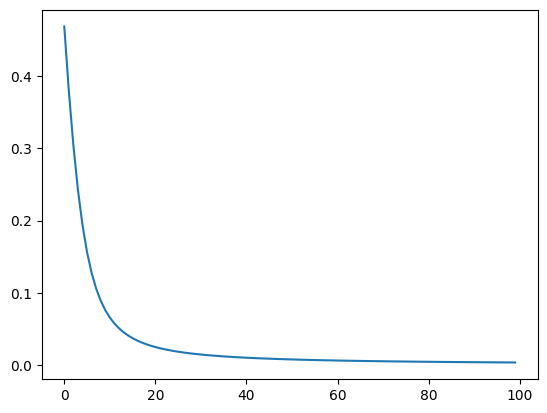

In [7]:
draw_dot(loss)
plt.plot(losses)
print(out.reshape(-1))